In [5]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt 
import time

In [6]:
def plot_results(predicted_data, true_data):
    plt.figure(facecolor='white', figsize=(20,10))
    plt.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'r').read()
    data = f.split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    # データ正規化
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    # トレーニング/テスト： 90/10
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data


def predict_result(model, data):
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [7]:
# データ取り込む
X_train, y_train, X_test, y_test = load_data('sp500.csv', 50, True)

In [12]:
# モデルを作る。二つのLTSM層を使う。最後のそうは普通のニューラルネットワーク層。結果は連続の値ですから、LinearのActivation関数を使う
model = Sequential()

model.add(LSTM(
    input_shape=(None, 1),
    units=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('モデルコンパイル時間 : ', time.time() - start)

モデルコンパイル時間 :  0.03617715835571289


In [13]:
#モデルトレーニング
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 16s - loss: 0.0024 - val_loss: 0.0013


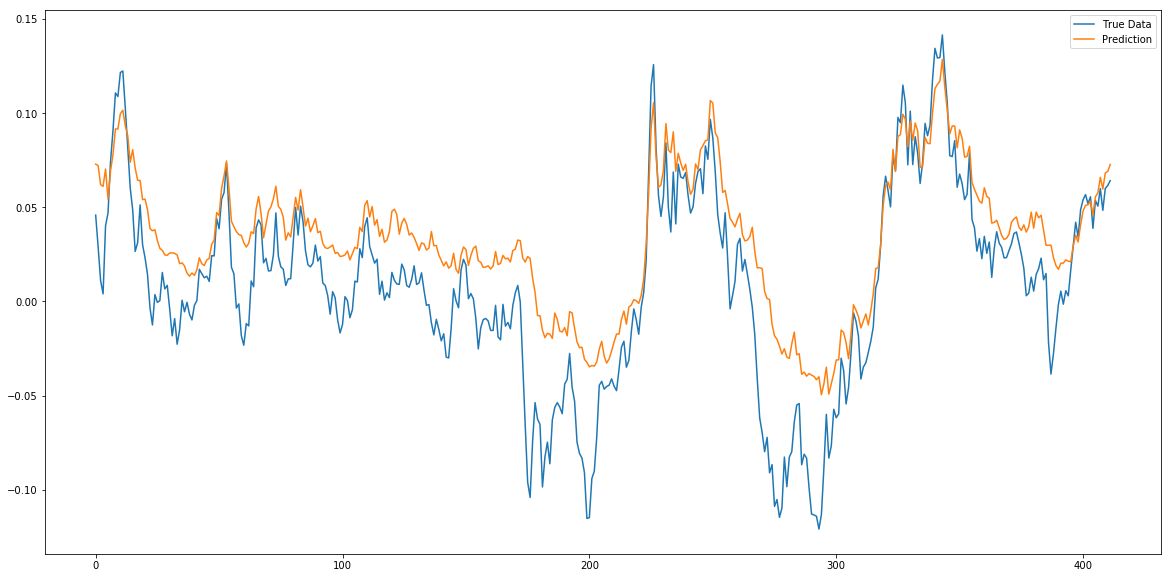

In [14]:
# 結果グラフ化
predictions = predict_result(model, X_test)
plot_results(predictions, y_test)